# Py-Tetrad Example Notebook

This is a tutorial on how to access [Tetrad](https://github.com/cmu-phil/tetrad) from Python, using [py-tetrad](https://github.com/cmu-phil/py-tetrad). It runs in Google Colab. 

Note that Colab resources are limited and are not persistent. If you want to keep your saved output, make a copy of this tutorial and move it out of Colab.

## Setup

In [ ]:
# check Python version
print('Python version:')
! python --version

# check Java version. Colab comes with Java already installed
print('\nJava version:')
!java -version

# install required packages quietly (remove the "-q" flag to see output)
print("\nInstalling packages ...")
! pip install -q causal-learn JPype1 graphviz
print('Done!')

Python version:
Python 3.9.16

Java version:
openjdk version "11.0.18" 2023-01-17
OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)

Installing packages ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.9/172.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 20.4 MB/s eta 0:00:00
Done!


In [ ]:
# clone tetrad repo if we haven't cloned it on a previous run of this notebook
import os
if not os.path.isdir('/content/py-tetrad'):
    !git clone https://github.com/cmu-phil/py-tetrad/
else:
    print(('py-tetrad dir already exists, presumably because we cloned it \n'
           'already. You should be able to run the notebook. (If you run into '
           '\nproblems, try deleting the directory then re-cloning it.)'))

Cloning into 'py-tetrad'...
remote: Enumerating objects: 4083, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 4083 (delta 169), reused 135 (delta 99), pack-reused 3850
Receiving objects: 100% (4083/4083), 88.27 MiB | 24.06 MiB/s, done.
Resolving deltas: 100% (2961/2961), done.


In [ ]:
# change working directory to pytetrad so all the relative imports work
# (once pytetrad is installable as a package, we won't have to do this)
%cd /content/py-tetrad/pytetrad

/content/py-tetrad/pytetrad


In [ ]:
# import python packages
import graphviz  
import pandas as pd
import jpype.imports

# here, jpype gives us the ability to import Tetrad classes from the jar
try:
    jpype.startJVM(classpath=[f"resources/tetrad-gui-current-launch.jar"])
except OSError:
    print("JVM already started")

# import Tetrad's search class
import tools.TetradSearch as search

## Data

In [ ]:
# load data
data = pd.read_csv("resources/airfoil-self-noise.continuous.txt", sep="\t")
data = data.astype({col: "float64" for col in data.columns})

## Search

In [ ]:
## Make a TetradSearch instance to run searches against. This helps to organize
## the use of Tetrad search algorithms and hides the JPype code for those who
## don't want to deal with it.
search = search.TetradSearch(data)
search.set_verbose(False)

## Pick the score to use, in this case a continuous linear, Gaussian score.
search.use_sem_bic()
search.use_fisher_z(alpha=0.05)

FGES


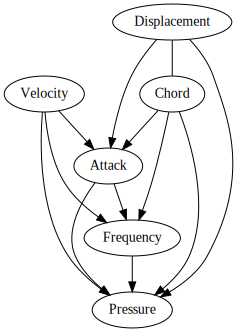

In [ ]:
# now we'll try a couple of search algorithms
print('FGES')
search.run_fges()  # learn the graph with FGES
# display the learned graph
graphviz.Source(search.get_dot())

BOSS


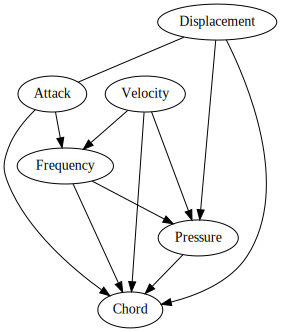

In [ ]:
print('BOSS')
search.run_boss()
graphviz.Source(search.get_dot())

## Finding Tetrad classes and methods

This tutorial can only cover a little. To become independent in your use of Tetrad, you need to know how to find things yourself.

Some Tetrad classes and methods already have nice Python interfaces located in the `tools` folder. Other classes and methods can be found in the Tetrad java package.

Expand the following sections to see lists of classes and methods available.

### Methods with Python interfaces
- The `TetradSearch` class
- The `translate` module
- The `simulate` module

In [ ]:
# the tools folder has classes & methods that have already been ported to python
! ls tools

__init__.py  __pycache__  simulate.py  TetradSearch.py	translate.py


In [ ]:
# the TetradSearch class that we used above has a lot of methods
dir(search)

['SCORE',
 'TEST',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_fobidden',
 'add_required',
 'add_to_tier',
 'bootstrap_dot',
 'bootstrap_graph',
 'bootstrap_graphs',
 'check_knowledge',
 'clear_knowledge',
 'data',
 'get_causal_learn',
 'get_data',
 'get_dot',
 'get_java',
 'get_knowledge',
 'get_lavaan',
 'get_pcalg',
 'get_string',
 'get_verbose',
 'get_xml',
 'java',
 'knowledge',
 'load_knowledge',
 'params',
 'print_knowledge',
 'run_bfci',
 'run_boss',
 'run_ccd',
 'run_cpc',
 'run_fci',
 'run_fges',
 'run_gango',
 'run_gfci',
 'run_grasp',
 'run_grasp_fci',
 'run_pc',
 'run_pcmax',
 'run_sp',
 'run_spfci',
 'run_svar_fci',
 'run_svar_gfci',
 'score',
 '

In [ ]:
# what if we want to know more about one of these methods?
# there's no docstring so the help is not super useful, but it does at least 
# give us the arguments
help(search.run_boss)

Help on method run_boss in module tools.TetradSearch:

run_boss(num_starts=1, depth=-1) method of tools.TetradSearch.TetradSearch instance



In [ ]:
# you can look at the source code ... though it uses methods imported from
# Tetrad, so you might still need to go back to the Java
??search.run_boss

In [ ]:
# translation classes and methods
import tools.translate as translate
dir(translate)

['BASE_DIR',
 'DataFrame',
 'Edge',
 'Endpoint',
 'GeneralGraph',
 'GraphNode',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'jpype',
 'np',
 'os',
 'pandas_data_to_tetrad',
 'pd',
 'sys',
 'td',
 'tetrad_data_to_pandas',
 'tetrad_graph_to_causal_learn',
 'tetrad_graph_to_pcalg',
 'util',
 'write_gdot']

In [ ]:
# simulation classes and methods
import tools.simulate as sim
dir(sim)

['Parameters',
 'Params',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'graph',
 'jpype',
 'sim',
 'simulateContinuous',
 'simulateDiscrete',
 'simulateLeeHastie',
 'tr']

### Methods in Tetrad jar

You can view [the source code](https://github.com/cmu-phil/tetrad/tree/development/tetrad-lib/src/main/java/edu/cmu/tetrad) for `edu.cmu.tetrad`.

In [ ]:
# we can also import tetrad straight from java
import edu.cmu.tetrad as tetrad

# show the modules in Tetrad
dir(tetrad)

['algcomparison',
 'annotation',
 'bayes',
 'calculator',
 'calibration',
 'cluster',
 'data',
 'gene',
 'graph',
 'performance',
 'regression',
 'search',
 'sem',
 'session',
 'simulation',
 'stat',
 'study',
 'util']

In [ ]:
# Find classes within a Tetrad module:
dir(tetrad.performance)

['Comparison',
 'Comparison2',
 'ComparisonParameters',
 'ComparisonResult',
 'ComparisonScript',
 'ExploreComparison',
 'PerformanceTests',
 'PerformanceTestsDan']

## Evaluate search results